### 1. A gaussian integral

Using Monte Carlo integration, check that

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

- Does the result converge with the number of samples? And how does the error go down?
- Do it many times. For a given $N$, how are the result distributed? We'll talk about model fitting at lenght later on, but for now try to fit it by hand with a parametrized model. (If N is large enough you should get something that looks *very* accurate! And if $N$ is small?)
- How does the distribution change if $N$ increases?

In [2]:
import numpy as np
import scipy.stats
import pylab as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.serif'] = ['Liberation Serif'] + plt.rcParams['font.serif']
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=[6,4]

Let's first try different sigma, keeping N fixed

monte carlo result:  0.00019847184964015525
true result:  0.00020000000000000004 

monte carlo result:  0.34655456307591526
true result:  0.3449625361987503 

monte carlo result:  3.9949750201818652
true result:  3.9957201950922143 

monte carlo result:  17.931027281864512
true result:  18.053372839506185 

monte carlo result:  53.98233801811501
true result:  53.83632449321753 

monte carlo result:  126.35517348240424
true result:  126.88048334095416 

monte carlo result:  254.14750104323696
true result:  256.9392617283952 

monte carlo result:  465.6781836737461
true result:  467.9835761621708 

monte carlo result:  789.1783999426779
true result:  788.2018473098614 

monte carlo result:  1256.451120597598
true result:  1250.0 


the results are pretty similar


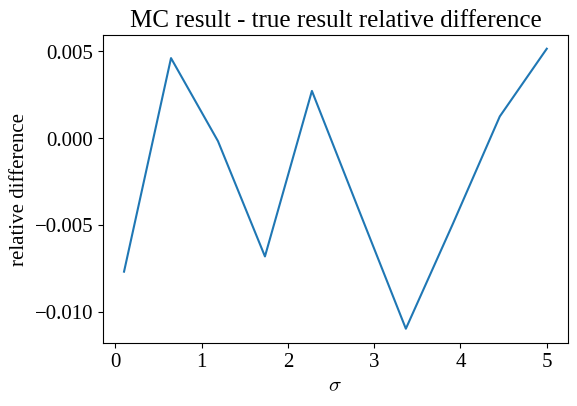

In [4]:
N=100000 #number of samples

sigma=np.linspace(0.1,5,10) #different sigma

#take as p(x) a gaussian, and then consider only from 0 to +inf

diff=np.empty(len(sigma))

for i in range(len(sigma)):
    draws=np.absolute(np.random.normal(loc=0, scale=sigma[i], size=N))

    integral=(np.pi/2)**(1/2)*sigma[i]*np.mean(draws**3)
    
    print("monte carlo result: ", integral)
    print("true result: ", 2*sigma[i]**4, "\n")
    
    diff[i]=(integral-2*sigma[i]**4)/integral

print("\nthe results are pretty similar")
plt.plot(sigma, diff)
plt.xlabel('$\sigma$')
plt.ylabel('relative difference')
plt.title('MC result - true result relative difference')
plt.show()

Try now to change the number of samples N, considering $\sigma=1$

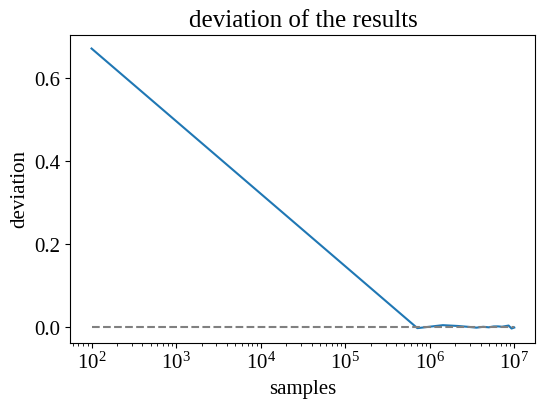

In [9]:
#let's fix sigma and change N

#number of samples
#N=np.array([10e2,10e3,10e4,10e5,10e6], dtype=int) #number of samples
N=np.linspace(100, 10e6, 15, dtype=int)

sigma=1

dev=np.empty(len(N))

for i in range(len(N)):
    draws=np.absolute(np.random.normal(loc=0, scale=sigma, size=N[i]))

    integral=(np.pi/2)**(1/2)*sigma*np.mean(draws**3)
    
#    print("monte carlo result: ", integral)
    
#    print("true result: ", 2*sigma**4)
    
    dev[i]= 2*sigma**4 - integral

plt.plot(N, dev)
plt.hlines(0, min(N), max(N), linestyles='dashed', colors='grey')
plt.xlabel("samples")
plt.ylabel("deviation")
plt.xscale('log')
plt.title('deviation of the results')
plt.show()

If we fix now N and $\sigma$ we can study the distribution of the results

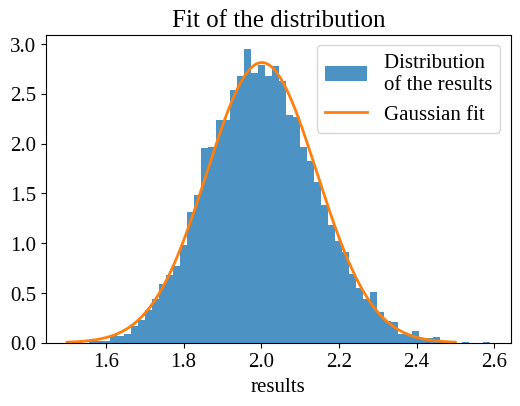

In [8]:
#fix now N and sigma and study the distribution of the results

N=1000 #number of samples
sigma=1 #sigma
res=10000 #number of results

distr=np.empty(res)

for i in range(res):
    draws=np.absolute(np.random.normal(loc=0, scale=sigma, size=N))

    integral=(np.pi/2)**(1/2)*sigma*np.mean(draws**3)
    
    distr[i]= integral

plt.hist(distr, bins=60, density=True, label='Distribution \nof the results', alpha=0.8)
plt.xlabel("results")

mean=np.mean(distr)
std=np.std(distr, ddof=1)
gauss = scipy.stats.norm(loc=mean,scale=std)
x = np.linspace(1.5,2.5,1000)
plt.plot(x,gauss.pdf(x), lw=2, label='Gaussian fit');
plt.legend()
plt.title('Fit of the distribution')
plt.show()

The results follow a Gaussian distribution, with the mean comparable with the true results of the integral $2\sigma^4=2$